## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  56.891664  1396.858962  0.999734  5.559435  1.581317
1  42.182623  1629.089464  0.242437  3.685701  1.404205
2  29.601474   250.261606  0.741544  1.264344  1.253151
3  60.517181   821.481821  0.992484  2.670233  1.467751
4  49.034739  1513.765497  0.772097  2.955928  1.653200


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0054928	total: 56.2ms	remaining: 56.2s
1:	learn: 0.9958877	total: 56.7ms	remaining: 28.3s
2:	learn: 0.9846774	total: 57.1ms	remaining: 19s
3:	learn: 0.9738868	total: 57.6ms	remaining: 14.4s
4:	learn: 0.9634065	total: 58ms	remaining: 11.5s
5:	learn: 0.9538513	total: 58.5ms	remaining: 9.69s
6:	learn: 0.9446247	total: 58.8ms	remaining: 8.34s
7:	learn: 0.9350890	total: 59.3ms	remaining: 7.36s
8:	learn: 0.9260001	total: 59.8ms	remaining: 6.58s
9:	learn: 0.9168753	total: 60.3ms	remaining: 5.97s
10:	learn: 0.9077873	total: 60.7ms	remaining: 5.46s
11:	learn: 0.8992114	total: 61.1ms	remaining: 5.03s
12:	learn: 0.8906088	total: 61.7ms	remaining: 4.69s
13:	learn: 0.8830553	total: 62.3ms	remaining: 4.38s
14:	learn: 0.8745833	total: 62.8ms	remaining: 4.12s
15:	learn: 0.8666530	total: 63.1ms	remaining: 3.88s
16:	learn: 0.8596537	total: 63.4ms	remaining: 3.67s
17:	learn: 0.8520653	total: 63.9ms	remaining: 3.49s
18:	learn: 0.8453825	total: 64.4ms	remaining: 3.

117:	learn: 0.4198508	total: 107ms	remaining: 800ms
118:	learn: 0.4178095	total: 108ms	remaining: 797ms
119:	learn: 0.4154621	total: 108ms	remaining: 791ms
120:	learn: 0.4131036	total: 108ms	remaining: 787ms
121:	learn: 0.4108840	total: 109ms	remaining: 781ms
122:	learn: 0.4089571	total: 109ms	remaining: 777ms
123:	learn: 0.4066810	total: 109ms	remaining: 773ms
124:	learn: 0.4047501	total: 110ms	remaining: 767ms
125:	learn: 0.4023140	total: 110ms	remaining: 763ms
126:	learn: 0.3997905	total: 110ms	remaining: 758ms
127:	learn: 0.3981181	total: 111ms	remaining: 754ms
128:	learn: 0.3958640	total: 111ms	remaining: 749ms
129:	learn: 0.3937428	total: 111ms	remaining: 746ms
130:	learn: 0.3918160	total: 112ms	remaining: 742ms
131:	learn: 0.3898320	total: 112ms	remaining: 739ms
132:	learn: 0.3876886	total: 113ms	remaining: 734ms
133:	learn: 0.3862685	total: 113ms	remaining: 732ms
134:	learn: 0.3843760	total: 117ms	remaining: 749ms
135:	learn: 0.3822041	total: 117ms	remaining: 745ms
136:	learn: 

294:	learn: 0.2150607	total: 186ms	remaining: 444ms
295:	learn: 0.2143707	total: 186ms	remaining: 443ms
296:	learn: 0.2140120	total: 187ms	remaining: 442ms
297:	learn: 0.2132182	total: 187ms	remaining: 441ms
298:	learn: 0.2123507	total: 188ms	remaining: 440ms
299:	learn: 0.2119998	total: 188ms	remaining: 439ms
300:	learn: 0.2115712	total: 189ms	remaining: 438ms
301:	learn: 0.2107652	total: 189ms	remaining: 437ms
302:	learn: 0.2105158	total: 192ms	remaining: 442ms
303:	learn: 0.2102692	total: 193ms	remaining: 441ms
304:	learn: 0.2095744	total: 193ms	remaining: 440ms
305:	learn: 0.2085874	total: 193ms	remaining: 439ms
306:	learn: 0.2082751	total: 194ms	remaining: 437ms
307:	learn: 0.2079432	total: 194ms	remaining: 436ms
308:	learn: 0.2071021	total: 195ms	remaining: 435ms
309:	learn: 0.2065712	total: 195ms	remaining: 435ms
310:	learn: 0.2063408	total: 196ms	remaining: 433ms
311:	learn: 0.2060586	total: 196ms	remaining: 432ms
312:	learn: 0.2053597	total: 196ms	remaining: 431ms
313:	learn: 

527:	learn: 0.1167705	total: 289ms	remaining: 258ms
528:	learn: 0.1162342	total: 289ms	remaining: 258ms
529:	learn: 0.1158564	total: 290ms	remaining: 257ms
530:	learn: 0.1156788	total: 290ms	remaining: 256ms
531:	learn: 0.1152471	total: 290ms	remaining: 255ms
532:	learn: 0.1150727	total: 291ms	remaining: 255ms
533:	learn: 0.1145506	total: 291ms	remaining: 254ms
534:	learn: 0.1143775	total: 292ms	remaining: 253ms
535:	learn: 0.1137691	total: 292ms	remaining: 253ms
536:	learn: 0.1136007	total: 293ms	remaining: 252ms
537:	learn: 0.1131045	total: 293ms	remaining: 252ms
538:	learn: 0.1126192	total: 293ms	remaining: 251ms
539:	learn: 0.1122036	total: 294ms	remaining: 250ms
540:	learn: 0.1117300	total: 294ms	remaining: 249ms
541:	learn: 0.1113273	total: 294ms	remaining: 249ms
542:	learn: 0.1108181	total: 295ms	remaining: 248ms
543:	learn: 0.1107112	total: 295ms	remaining: 247ms
544:	learn: 0.1105172	total: 295ms	remaining: 247ms
545:	learn: 0.1104136	total: 296ms	remaining: 246ms
546:	learn: 

713:	learn: 0.0733594	total: 366ms	remaining: 147ms
714:	learn: 0.0731731	total: 367ms	remaining: 146ms
715:	learn: 0.0728785	total: 367ms	remaining: 146ms
716:	learn: 0.0726551	total: 368ms	remaining: 145ms
717:	learn: 0.0725160	total: 368ms	remaining: 145ms
718:	learn: 0.0723326	total: 368ms	remaining: 144ms
719:	learn: 0.0720535	total: 369ms	remaining: 143ms
720:	learn: 0.0718541	total: 369ms	remaining: 143ms
721:	learn: 0.0716752	total: 369ms	remaining: 142ms
722:	learn: 0.0715378	total: 370ms	remaining: 142ms
723:	learn: 0.0713608	total: 370ms	remaining: 141ms
724:	learn: 0.0711644	total: 371ms	remaining: 141ms
725:	learn: 0.0709710	total: 371ms	remaining: 140ms
726:	learn: 0.0708096	total: 371ms	remaining: 139ms
727:	learn: 0.0707833	total: 372ms	remaining: 139ms
728:	learn: 0.0705227	total: 372ms	remaining: 138ms
729:	learn: 0.0703514	total: 373ms	remaining: 138ms
730:	learn: 0.0702153	total: 373ms	remaining: 137ms
731:	learn: 0.0699806	total: 374ms	remaining: 137ms
732:	learn: 

955:	learn: 0.0434720	total: 469ms	remaining: 21.6ms
956:	learn: 0.0433791	total: 470ms	remaining: 21.1ms
957:	learn: 0.0432694	total: 470ms	remaining: 20.6ms
958:	learn: 0.0431617	total: 471ms	remaining: 20.1ms
959:	learn: 0.0430628	total: 471ms	remaining: 19.6ms
960:	learn: 0.0429575	total: 471ms	remaining: 19.1ms
961:	learn: 0.0427814	total: 472ms	remaining: 18.6ms
962:	learn: 0.0426845	total: 472ms	remaining: 18.1ms
963:	learn: 0.0426247	total: 473ms	remaining: 17.7ms
964:	learn: 0.0424527	total: 473ms	remaining: 17.2ms
965:	learn: 0.0423941	total: 474ms	remaining: 16.7ms
966:	learn: 0.0422989	total: 474ms	remaining: 16.2ms
967:	learn: 0.0422112	total: 474ms	remaining: 15.7ms
968:	learn: 0.0421088	total: 475ms	remaining: 15.2ms
969:	learn: 0.0420049	total: 475ms	remaining: 14.7ms
970:	learn: 0.0419028	total: 475ms	remaining: 14.2ms
971:	learn: 0.0418096	total: 476ms	remaining: 13.7ms
972:	learn: 0.0417525	total: 476ms	remaining: 13.2ms
973:	learn: 0.0416609	total: 476ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

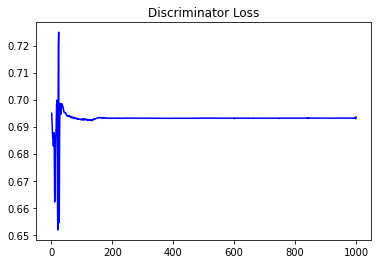

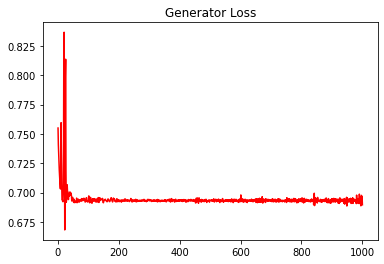

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.44816399681947583


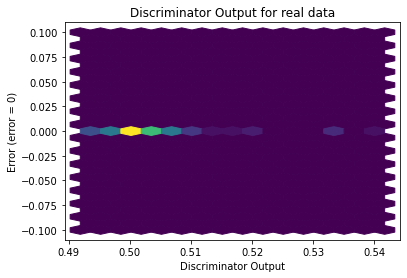

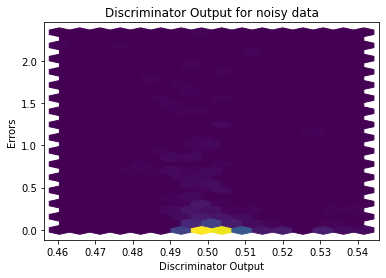

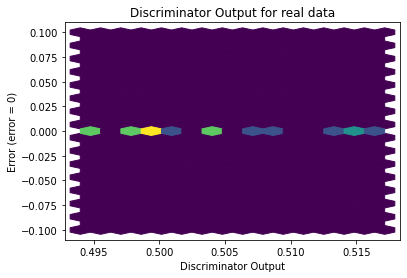

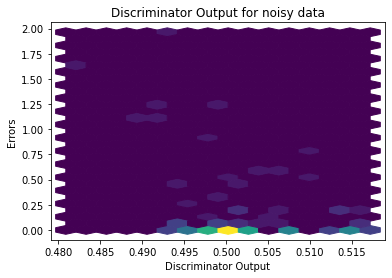

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


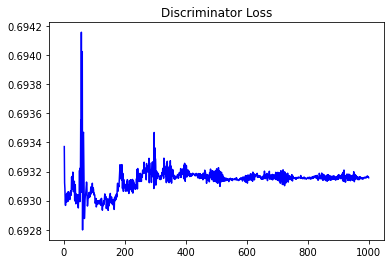

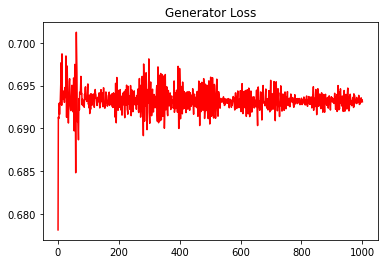

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4087360901674821


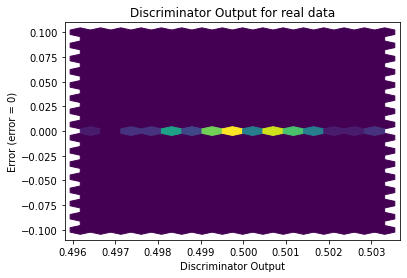

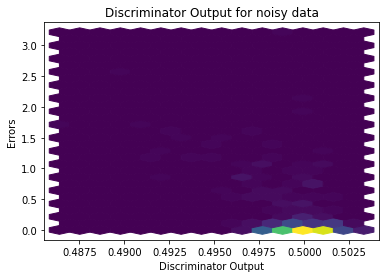

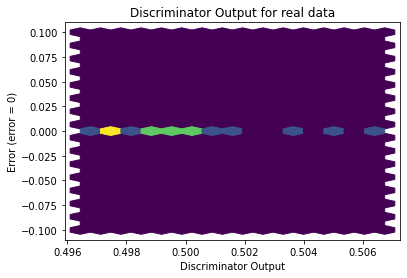

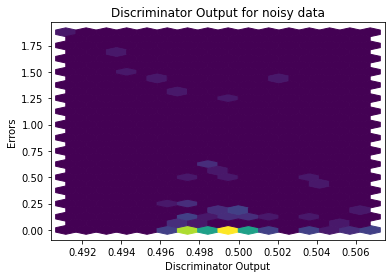

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0671]], requires_grad=True)
